In [59]:
import qiskit as q
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram
from matplotlib import style
%matplotlib inline

statevec_simulator = q.Aer.get_backend("statevector_simulator")
qasm_sim = q.Aer.get_backend('qasm_simulator')

def do_job(circuit):
    job = q.execute(circuit, backend=statevec_simulator)
    result = job.result()
    statevec = result.get_statevector()
    
    n_qubits = circuit.num_qubits
    circuit.measure([i for i in range(n_qubits)], [i for i in range(n_qubits)])
    
    qasm_job = q.execute(circuit, backend=qasm_sim, shots=1024).result()
    counts = qasm_job.get_counts()
    
    return statevec, counts

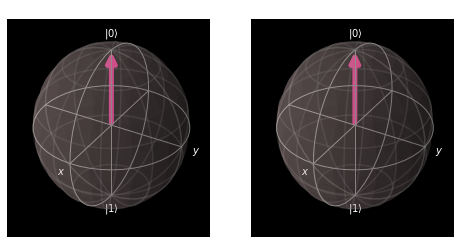

In [60]:
circuit = q.QuantumCircuit(2,2)  # 2 qubits, 2 classical bits 
statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

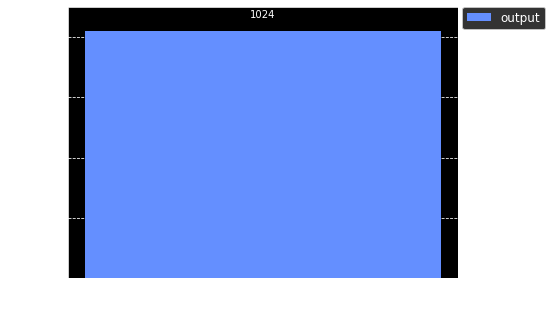

In [61]:
plot_histogram([counts], legend=['output'])

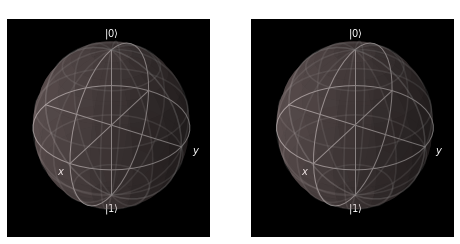

In [26]:
circuit = q.QuantumCircuit(2,2)  # 2 qubits, 2 classical bits 
circuit.h(0)  # hadamard gate on qubit0
circuit.cx(0,1)
statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

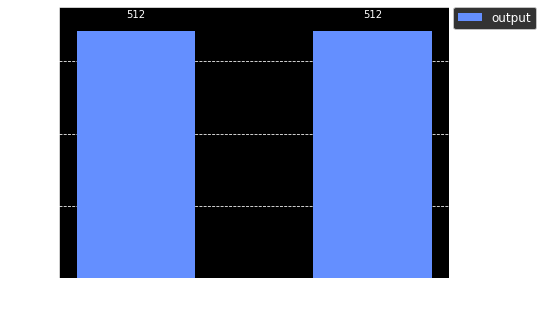

In [27]:
plot_histogram([counts], legend=["output"])

In [36]:
circuit = q.QuantumCircuit(3,3)  # 2 qubits, 2 classical bits 
circuit.h(0) # hadamard gate on qubit0
circuit.h(1)
circuit.ccx(0,1,2)
circuit.draw()
# statevec, counts = do_job(circuit)
# plot_bloch_multivector(statevec)

┌───┐     
q_0: ┤ H ├──■──
     ├───┤  │  
q_1: ┤ H ├──■──
     └───┘┌─┴─┐
q_2: ─────┤ X ├
          └───┘
c: 3/══════════

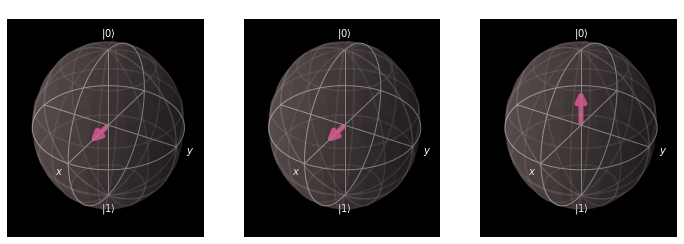

In [37]:
statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

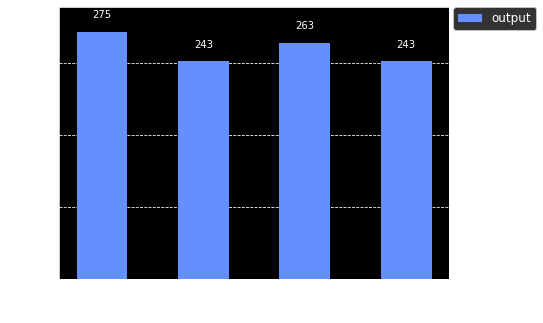

In [38]:
plot_histogram([counts], legend=["output"])

In [39]:
circuit = q.QuantumCircuit(3,1) 
circuit.h(0) 
circuit.h(1)
circuit.ccx(0,1,2)
circuit.measure([2], [0])
circuit.draw()

┌───┐        
q_0: ┤ H ├──■─────
     ├───┤  │     
q_1: ┤ H ├──■─────
     └───┘┌─┴─┐┌─┐
q_2: ─────┤ X ├┤M├
          └───┘└╥┘
c: 1/═══════════╩═
                0

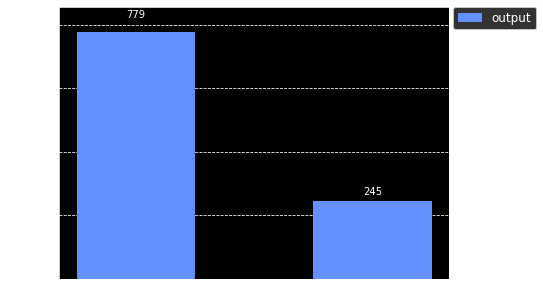

In [40]:
qasm_job = q.execute(circuit, backend=qasm_sim, shots=1024).result()
counts = qasm_job.get_counts()
plot_histogram([counts], legend=["output"])

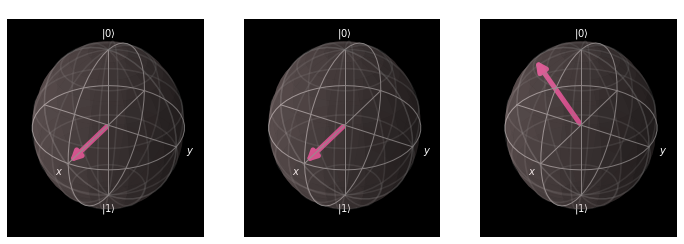

In [46]:
import math
circuit = q.QuantumCircuit(3,3)  # 2 qubits, 2 classical bits 
circuit.h(0) # hadamard gate on qubit0
circuit.h(1)
circuit.rx(math.pi/4, 2)
#circuit.x(2)
statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

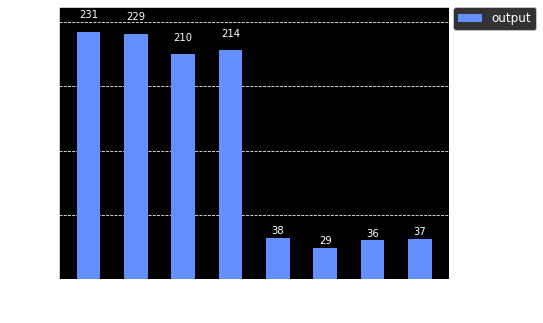

In [47]:
plot_histogram([counts], legend=["output"])

In [49]:
circuit = q.QuantumCircuit(3,1)  
circuit.h(0) # hadamard gate on qubit0
circuit.h(1)
circuit.rx(math.pi/4, 2)
circuit.measure([2], [0])
circuit.draw()

┌───┐      
q_0: ───┤ H ├──────
        ├───┤      
q_1: ───┤ H ├──────
     ┌──┴───┴──┐┌─┐
q_2: ┤ Rx(π/4) ├┤M├
     └─────────┘└╥┘
c: 1/════════════╩═
                 0

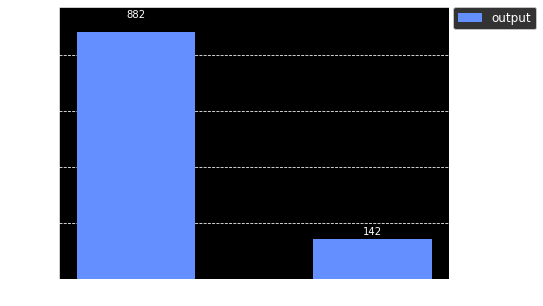

In [50]:
qasm_job = q.execute(circuit, backend=qasm_sim, shots=1024).result()
counts = qasm_job.get_counts()
plot_histogram([counts], legend=["output"])